# <b> Lending Club Case Study

# <b> Problem Statement !!
#Lending Club is a marketplace for personal loans that matches borrowers who are seeking a loan with investors looking to lend money and make a return. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile.Two types of risks are associated with the bank’s decision:
    
1)If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company    
2)If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company
    
The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.


In [1]:
# Import all necessary libraries and set the options that are needed : 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None) # Displays all columns
#pd.set_option('display.max_rows', None) # Displays all rows

In [2]:
# As this is big file, you're basically telling Pandas not to be efficient, and process the whole file, all at once
inp = pd.read_csv ("loan.csv", low_memory=False)

In [3]:
# check the first five rows - Data Checking
inp.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,11-Dec,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,15-Jan,171.62,NaN,16-May,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,11-Dec,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,13-Apr,119.66,NaN,13-Sep,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,11-Dec,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,1-Nov,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,14-Jun,649.91,NaN,16-May,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,11-Dec,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,15-Jan,357.48,NaN,16-Apr,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
#Check the shape of the dataframe
inp.shape

(39717, 111)

In [5]:
#Execute describe and observe for min, max, mean and respective %'s'
inp.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

# <b> Data Handiling and Cleaning

In [6]:
# Checking data attributes before proceeding further.
# Will try create correlation between variables which are required for case study
# Checking shape and datatype of loan (loanData Variable)data
print(inp.shape)
print(inp.info())
print(inp.dtypes)

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


In [7]:
#Check for the number of null values in each of the columns
inp.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [8]:
# Drop columns with all missing values in a given column and create a subset dataframe for further usage
inp1 = inp.dropna(axis=1,how='all')

In [9]:
#Check the shape of the subset - dataframe
inp1.shape

(39717, 57)

In [10]:
# Drop columns - the customer behavior variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval. Hence dropping below columns:
inp2 = inp1.drop(columns=['delinq_2yrs',
'earliest_cr_line',
'inq_last_6mths',
'open_acc',
'pub_rec',
'revol_bal',
'revol_util',
'total_acc',
'out_prncp',
'out_prncp_inv',
'total_pymnt',
'total_pymnt_inv',
'total_rec_prncp',
'total_rec_int',
'total_rec_late_fee',
'recoveries',
'collection_recovery_fee',
'last_pymnt_d',
'last_pymnt_amnt',
'last_credit_pull_d',
'application_type',
'tax_liens',
'delinq_amnt',
'policy_code',
'acc_now_delinq',
'chargeoff_within_12_mths',
'collections_12_mths_ex_med',
'initial_list_status',
'url',
'pymnt_plan'
]) 

In [11]:
#replacing nan with NA in title and emp_title
inp2["title"].fillna("NA", inplace=True)
inp2["emp_title"].fillna("NA", inplace=True)

#dropping the rows where home ownership is none as it has only 3 rows.
inp2 = inp2[inp2['home_ownership'] != 'NONE']

In [12]:
#Check the shape after dropping the columns that are needed in future for analysis purpose:
inp2.shape

(39714, 27)

In [13]:
#As loan type = Current is not going tobe used in analysis hence, create a subset of dataframe by filtering the data with Charged off and Fully Paid only. 
inp2_Fully_Paid_Charged_off = inp2 [ inp2 ['loan_status'].isin (['Charged Off','Fully Paid'])]

In [14]:
#Check the shape after dropping filtering the un-wanted data:
inp2_Fully_Paid_Charged_off.shape

(38574, 27)

In [15]:
#Have a quick look at the data after filtering the unwanted data:
inp2_Fully_Paid_Charged_off.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,title,zip_code,addr_state,dti,mths_since_last_delinq,mths_since_last_record,next_pymnt_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NA,10+ years,RENT,24000.0,Verified,11-Dec,Fully Paid,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,NaN,NaN,NaN,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,11-Dec,Charged Off,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,NaN,NaN,NaN,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NA,10+ years,RENT,12252.0,Not Verified,11-Dec,Fully Paid,NaN,small_business,real estate business,606xx,IL,8.72,NaN,NaN,NaN,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,11-Dec,Fully Paid,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,35.0,NaN,NaN,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,11-Dec,Fully Paid,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,NaN,NaN,NaN,0.0


In [16]:
#Execute describe and observe for min, max, mean and respective %'s'
inp2_Fully_Paid_Charged_off.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,mths_since_last_delinq,mths_since_last_record,pub_rec_bankruptcies
count,3.857400e+04,3.857400e+04,38574.000000,38574.000000,38574.000000,38574.000000,3.857400e+04,38574.000000,13671.000000,2739.000000,37880.000000
mean,6.764190e+05,8.423380e+05,11047.449059,10784.461684,10223.152285,322.477676,6.877704e+04,13.272846,35.885158,69.286236,0.043479
std,2.092216e+05,2.643920e+05,7348.517888,7090.379936,7022.580869,208.641585,6.422001e+04,6.673167,22.026761,43.975870,0.204583
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000
25%,5.120530e+05,6.611658e+05,5300.000000,5200.000000,5000.000000,165.740000,4.000000e+04,8.130000,18.000000,20.500000,0.000000
50%,6.564560e+05,8.393005e+05,9600.000000,9550.000000,8736.649151,277.860000,5.886028e+04,13.370000,34.000000,90.000000,0.000000
75%,8.291475e+05,1.037340e+06,15000.000000,15000.000000,14000.000000,425.550000,8.200000e+04,18.560000,52.000000,104.000000,0.000000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,120.000000,129.000000,2.000000


# <b> By looking at the data and column, analyze what the next steps should be:
    1)List the columns that we will be analysis and plotting the graphs for analysis
    2)Clean the data when needed - NULL and outliers
    3)Perform transformation whenever needed
    By looking at the data here are the columns that I think we should be doing analysis(inital). Based on further finding, I will be adding more columns if needed - term, load_amt, emp_length, annual_inc, grade, purpose, home_ownership, verification_status, addr_state, dti

In [17]:
#Check for null values in emp length columns
inp2_Fully_Paid_Charged_off.emp_length.isnull().sum()

1033

In [18]:
#Check the shape before dropping or performing any trasnformation on emp length column:
inp2_Fully_Paid_Charged_off.shape

(38574, 27)

In [19]:
#By looking at the data, dropping the rows that are null (for column emp length) is good option than taking mean, median or mode
inp2_Fully_Paid_Charged_off = inp2_Fully_Paid_Charged_off[pd.notnull(inp2_Fully_Paid_Charged_off['emp_length'])]

In [20]:
#check if there are any null values:
inp2_Fully_Paid_Charged_off.emp_length.isnull().sum()

0

In [21]:
#Check the shape after dropping null values rows for column emp length
inp2_Fully_Paid_Charged_off.shape

(37541, 27)

In [22]:
#Check for distinct values in emp length columns:
inp2_Fully_Paid_Charged_off.emp_length.value_counts()

10+ years    8488
< 1 year     4506
2 years      4291
3 years      4012
4 years      3342
5 years      3193
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [23]:
inp2_Fully_Paid_Charged_off.emp_length.dtypes

dtype('O')

In [24]:
#Transform the data in to numeric(convert in to int), which will make you easy for plotting:
#Question Clean the emp_length Column
def clean_emp_length(val):
    return int(val.replace("<","").replace("+","").replace("years","").replace("year",""))
inp2_Fully_Paid_Charged_off.emp_length = inp2_Fully_Paid_Charged_off.emp_length.apply(clean_emp_length)
inp2_Fully_Paid_Charged_off.emp_length.describe()

count    37541.000000
mean         5.061266
std          3.401757
min          1.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

In [25]:
#Check for distinct values in emp length columns after trasforming:
inp2_Fully_Paid_Charged_off.emp_length.value_counts()

10    8488
1     7675
2     4291
3     4012
4     3342
5     3193
6     2168
7     1711
8     1435
9     1226
Name: emp_length, dtype: int64

In [26]:
#Check for null values in load status column
inp2_Fully_Paid_Charged_off.loan_status.isnull().sum()

0

In [27]:
#Check for distinct values in loan status column and confirm no need of cleaning up the data:
inp2_Fully_Paid_Charged_off.loan_status.value_counts()

Fully Paid     32142
Charged Off     5399
Name: loan_status, dtype: int64

In [28]:
#Create a new column - flag based on load status (numeric column), so that it's easy for plotting:
#inp2_Fully_Paid_Charged_off.loan_status_Flag = inp2_Fully_Paid_Charged_off.loan_status.apply(lambda x: 1 if x=="Charged Off" else 0)
##Note - It throws warning the first time (but variable is successfully creating for future purpose. If I execute the same statement again, its working fine)

In [29]:
#Check the column that newely created and validate the values are as expected:
#inp2_Fully_Paid_Charged_off.loan_status_Flag.head()

In [30]:
##Check for null values in term column
inp2_Fully_Paid_Charged_off.term.isnull().sum()

0

In [31]:
#Check for distinct values in term column and confirm no need of cleaning up the data:
inp2_Fully_Paid_Charged_off.term.value_counts()

 36 months    28284
 60 months     9257
Name: term, dtype: int64

In [32]:
#Check for null values in loan amount column
inp2_Fully_Paid_Charged_off.loan_amnt.isnull().sum()

0

In [33]:
#Check for distinct values in loan amt column and confirm no need of cleaning up the data:
inp2_Fully_Paid_Charged_off.loan_amnt.value_counts()

10000    2741
12000    2213
5000     1959
6000     1834
15000    1805
         ... 
34525       1
13275       1
11275       1
23275       1
22550       1
Name: loan_amnt, Length: 866, dtype: int64

In [34]:
#Quick check on datatypes
inp2_Fully_Paid_Charged_off.dtypes

id                          int64
member_id                   int64
loan_amnt                   int64
funded_amnt                 int64
funded_amnt_inv           float64
term                       object
int_rate                   object
installment               float64
grade                      object
sub_grade                  object
emp_title                  object
emp_length                  int64
home_ownership             object
annual_inc                float64
verification_status        object
issue_d                    object
loan_status                object
desc                       object
purpose                    object
title                      object
zip_code                   object
addr_state                 object
dti                       float64
mths_since_last_delinq    float64
mths_since_last_record    float64
next_pymnt_d               object
pub_rec_bankruptcies      float64
dtype: object

In [35]:
#Check for null values in annual inc column
inp2_Fully_Paid_Charged_off.annual_inc.isnull().sum()

0

In [36]:
#Check for distinct values in annual inc column and confirm no need of cleaning up the data:
inp2_Fully_Paid_Charged_off.annual_inc.value_counts()

60000.0     1434
50000.0     1009
40000.0      838
45000.0      794
75000.0      779
            ... 
85634.0        1
126996.0       1
57110.0        1
74758.0        1
27376.0        1
Name: annual_inc, Length: 5006, dtype: int64

In [37]:
# Convert annual inc column to integer for plotting and validate the same.
inp2_Fully_Paid_Charged_off.annual_inc = inp2_Fully_Paid_Charged_off.annual_inc.astype("int32")
inp2_Fully_Paid_Charged_off.annual_inc.dtypes

dtype('int32')

In [38]:
#Check for null values in grade column
inp2_Fully_Paid_Charged_off.grade.isnull().sum()

0

In [39]:
#Check for distinct values in grade column and confirm no need of cleaning up the data:
inp2_Fully_Paid_Charged_off.grade.value_counts()

B    11357
A     9659
C     7669
D     4979
E     2620
F      959
G      298
Name: grade, dtype: int64

In [40]:
#Check for null values in purpose column
inp2_Fully_Paid_Charged_off.purpose.isnull().sum()

0

In [41]:
#Check for distinct values in purpose column and confirm no need of cleaning up the data:
inp2_Fully_Paid_Charged_off.purpose.value_counts()

debt_consolidation    17674
credit_card            4899
other                  3711
home_improvement       2785
major_purchase         2080
small_business         1710
car                    1448
wedding                 913
medical                 656
moving                  552
house                   354
vacation                348
educational             317
renewable_energy         94
Name: purpose, dtype: int64

In [42]:
#Check for null values in home ownership column
inp2_Fully_Paid_Charged_off.home_ownership.isnull().sum()

0

In [43]:
#Check for distinct values in home owner and confirm no need of cleaning up the data:
inp2_Fully_Paid_Charged_off.home_ownership.value_counts()

RENT        18078
MORTGAGE    16595
OWN          2770
OTHER          98
Name: home_ownership, dtype: int64

In [44]:
#Check for null values in verification status column
inp2_Fully_Paid_Charged_off.verification_status.isnull().sum()

0

In [45]:
#Check for distinct values in verification status and confirm no need of cleaning up the data:
inp2_Fully_Paid_Charged_off.verification_status.value_counts()

Not Verified       16275
Verified           11772
Source Verified     9494
Name: verification_status, dtype: int64

In [46]:
#Check for null values in addr state status column
inp2_Fully_Paid_Charged_off.addr_state.isnull().sum()

0

In [47]:
#Check for distinct values in addr state and confirm no need of cleaning up the data:
inp2_Fully_Paid_Charged_off.addr_state.value_counts()

CA    6767
NY    3599
FL    2694
TX    2605
NJ    1768
IL    1442
PA    1437
VA    1339
GA    1319
MA    1267
OH    1146
MD    1005
AZ     806
WA     783
CO     744
NC     726
CT     707
MI     671
MO     647
MN     583
NV     464
SC     451
WI     426
OR     421
AL     418
LA     417
KY     307
OK     282
UT     247
KS     244
AR     227
DC     211
RI     192
NM     179
WV     164
HI     162
NH     157
DE     110
MT      77
AK      76
WY      76
SD      61
VT      53
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: addr_state, dtype: int64

# <b> EDA: Exploratory data analysis

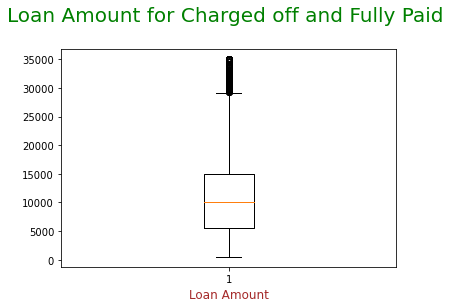

In [48]:
#Create a box plot for the loan amount column, check for outliers and drop the rows that are outliers (those which are not needed for further analysis)
import matplotlib.pyplot as plt
%matplotlib inline
plt.title("Loan Amount for Charged off and Fully Paid \n", fontdict = {'fontsize':20, 'fontweight':20, 'color':'Green'})
plt.xlabel("Loan Amount", fontdict = {'fontsize':12, 'fontweight':5, 'color':'Brown'})
plt.boxplot(inp2_Fully_Paid_Charged_off.loan_amnt)
plt.show()

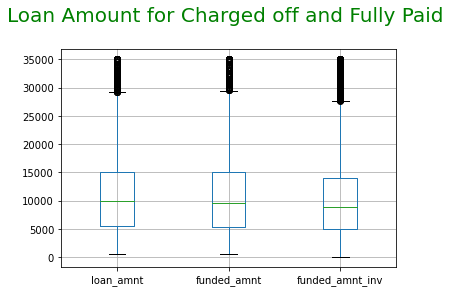

In [49]:
#checking if there are any outliers in the columns containing numerical values
plt.title("Loan Amount for Charged off and Fully Paid \n", fontdict = {'fontsize':20, 'fontweight':20, 'color':'Green'})
inp2_Fully_Paid_Charged_off.boxplot(column=['loan_amnt','funded_amnt','funded_amnt_inv']);

# <b>Insights:
   #<b>By looking the plot, it's clear that above 30k loan amount (funded amount, funded_amt_inv) rows are oulier and can be removed

In [50]:
#Check the count of rows where loan amount is greater than or equal to 30k
inp2_Fully_Paid_Charged_off[inp2_Fully_Paid_Charged_off.loan_amnt >= 30000].loan_amnt.count()

1057

In [51]:
#Clean the loan amount column based on above analysis column
inp2_Fully_Paid_Charged_off = inp2_Fully_Paid_Charged_off[inp2_Fully_Paid_Charged_off.loan_amnt < 30000]

In [52]:
#Check the count of rows after dropping the outliers( where loan amount is greater than or equal to 30k)
inp2_Fully_Paid_Charged_off[inp2_Fully_Paid_Charged_off.loan_amnt >= 30000].loan_amnt.count()

0

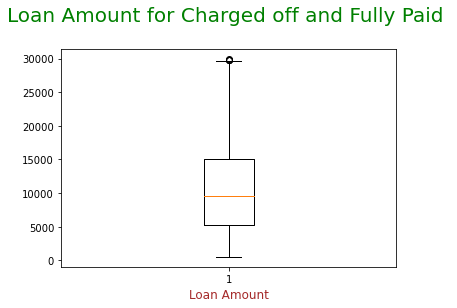

In [53]:
#Validate the plot after dropping the outliers (loan_amt greaterthan or euqal to 30k)
import matplotlib.pyplot as plt
%matplotlib inline
plt.title("Loan Amount for Charged off and Fully Paid \n", fontdict = {'fontsize':20, 'fontweight':20, 'color':'Green'})
plt.xlabel("Loan Amount", fontdict = {'fontsize':12, 'fontweight':5, 'color':'Brown'})
plt.boxplot(inp2_Fully_Paid_Charged_off.loan_amnt)
plt.show()

# <b>Insights:
   #<b>outliers under loan amount column are removed

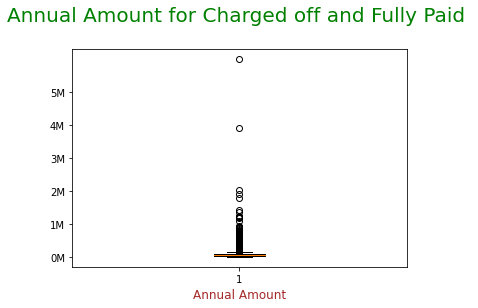

In [54]:
#Create a box plot for the Annual Income column, check for outliers and drop the rows that are outliers (those which are not needed for further analysis)
plt.title("Annual Amount for Charged off and Fully Paid \n", fontdict = {'fontsize':20, 'fontweight':20, 'color':'Green'})
plt.xlabel("Annual Amount", fontdict = {'fontsize':12, 'fontweight':5, 'color':'Brown'})
plt.boxplot(inp2_Fully_Paid_Charged_off.annual_inc)
#Modify the ticks to show information in (million dollars)
ticks = np.arange(0,6000000,1000000)
labels = ["{}M".format(i//1000000) for i in ticks]
plt.yticks(ticks, labels)
plt.show()

In [55]:
#Check the count of rows where Annual amount is greater than or equal to 300k
inp2_Fully_Paid_Charged_off[inp2_Fully_Paid_Charged_off.annual_inc >= 300000].annual_inc.count()

172

In [56]:
#Clean the Annual amount column based on above analysis column
inp2_Fully_Paid_Charged_off = inp2_Fully_Paid_Charged_off[inp2_Fully_Paid_Charged_off.annual_inc < 300000]

In [57]:
#Check the count of rows after dropping the outliers( where annual amt is greater than or equal to 300k)
inp2_Fully_Paid_Charged_off[inp2_Fully_Paid_Charged_off.annual_inc >= 300000].annual_inc.count()

0

# <b>Insights:
   #<b>outliers under annual amount column are removed sucessfully !!

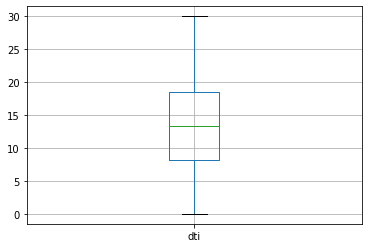

In [58]:
inp2_Fully_Paid_Charged_off.boxplot(column=['dti']);
#There are no outliers in dti column;

In [59]:
#Remove % for interest rate column; so that we can plot for the analysis
#Remove % for interest rate column; so that we can plot for the analysis
def clean_int_rate(val):
    return (val.replace("%",""))
inp2_Fully_Paid_Charged_off.int_rate = inp2_Fully_Paid_Charged_off.int_rate.apply(clean_int_rate)

In [60]:
#change the datatype of the interest rate column to int32;
inp2_Fully_Paid_Charged_off.int_rate = inp2_Fully_Paid_Charged_off.int_rate.astype("float")
inp2_Fully_Paid_Charged_off.int_rate = inp2_Fully_Paid_Charged_off.int_rate.astype("int32")

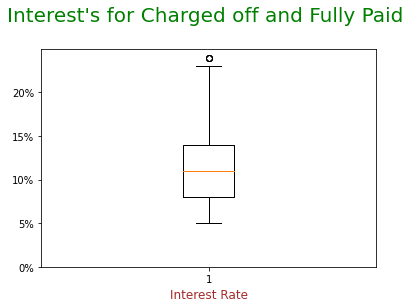

In [61]:
#Create a box plot for the interest rate column, check for outliers and drop the rows that are outliers (those which are not needed for further analysis)
plt.title("Interest's for Charged off and Fully Paid \n", fontdict = {'fontsize':20, 'fontweight':20, 'color':'Green'})
plt.xlabel("Interest Rate", fontdict = {'fontsize':12, 'fontweight':5, 'color':'Brown'})
plt.boxplot(inp2_Fully_Paid_Charged_off.int_rate)
#Modify the ticks to show information in (%'s')
ticks = np.arange(0,25,5)
labels = ["{}%".format(i//1) for i in ticks]
plt.yticks(ticks, labels)
plt.show()

In [62]:
#Check the count of rows where interest rate is greater than or equal to 22k
inp2_Fully_Paid_Charged_off[inp2_Fully_Paid_Charged_off.int_rate >= 22].int_rate.count()

102

In [63]:
#Clean the interest rate column based on above analysis column
inp2_Fully_Paid_Charged_off = inp2_Fully_Paid_Charged_off[inp2_Fully_Paid_Charged_off.int_rate < 22]

In [64]:
#Check the count of rows where interest rate is greater than or equal to 22k
inp2_Fully_Paid_Charged_off[inp2_Fully_Paid_Charged_off.int_rate >= 22].int_rate.count()

0

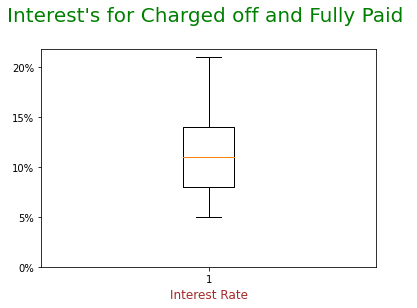

In [65]:
#Create a box plot for the Annual Income column, check for outliers and drop the rows that are outliers (those which are not needed for further analysis)
plt.title("Interest's for Charged off and Fully Paid \n", fontdict = {'fontsize':20, 'fontweight':20, 'color':'Green'})
plt.xlabel("Interest Rate", fontdict = {'fontsize':12, 'fontweight':5, 'color':'Brown'})
plt.boxplot(inp2_Fully_Paid_Charged_off.int_rate)
#Modify the ticks to show information in (%'s')
ticks = np.arange(0,25,5)
labels = ["{}%".format(i//1) for i in ticks]
plt.yticks(ticks, labels)
plt.show()

# <b>Insights:
   #<b>outliers under interest rate column are removed sucessfully !!

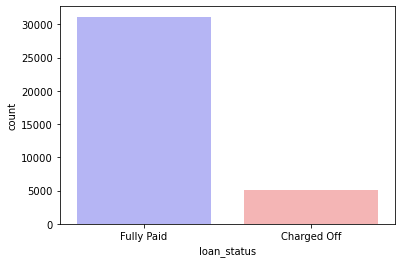

In [66]:
#Check the count per loan status
inp2_Fully_Paid_Charged_off.loan_status.value_counts()
sns.countplot(x="loan_status", data=inp2_Fully_Paid_Charged_off, palette="bwr")
plt.show()

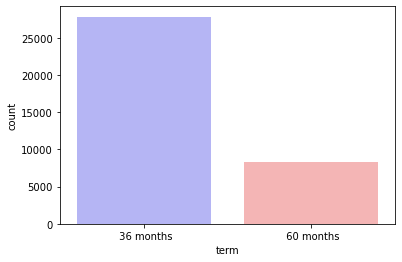

In [67]:
#Check the count per term
inp2_Fully_Paid_Charged_off.term.value_counts()
sns.countplot(x="term", data=inp2_Fully_Paid_Charged_off, palette="bwr")
plt.show()

# <b>Insights:
   #<b> BY looking at the plot, we can clearly say; there are more customers in 36 months term than 60 months

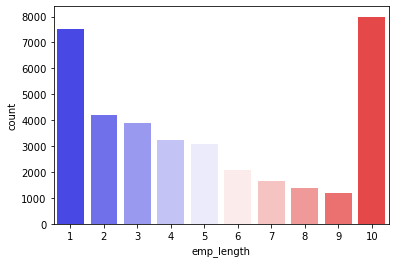

In [68]:
#Check the count per emp length
inp2_Fully_Paid_Charged_off.emp_length.value_counts()
sns.countplot(x="emp_length", data=inp2_Fully_Paid_Charged_off, palette="bwr")
plt.show()

# <b>Insights:
   #<b> BY looking at the plot, we can clearly say; there are more customers whose emp length is greater than 10

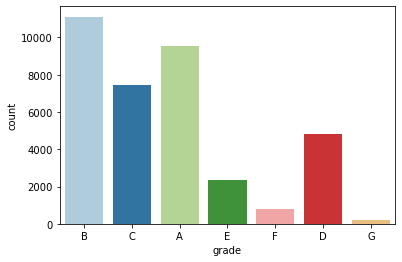

In [69]:
#Check the count per grade
inp2_Fully_Paid_Charged_off.grade.value_counts()
sns.countplot(x="grade", data=inp2_Fully_Paid_Charged_off, palette="Paired")
plt.show()

# <b>Insights:
   #<b> BY looking at the plot, we can clearly say; there are more customers in Grade B compare to each other and A is followed by B and c followed by A.

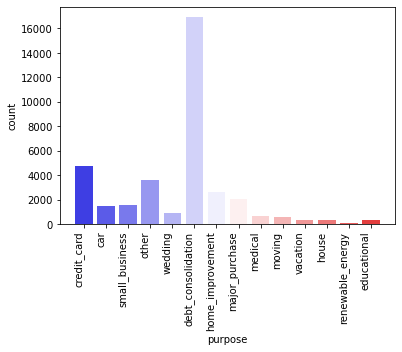

In [70]:
#Check the count per purpose
inp2_Fully_Paid_Charged_off.purpose.value_counts()
sns.countplot(x="purpose", data=inp2_Fully_Paid_Charged_off, palette="bwr").plot(kind="bar",figsize=(20,10))
plt.xticks(rotation=90, ha='right')
plt.show()

# <b>Insights:
   #<b> BY looking at the plot, we can clearly say; there are more customers in debt_consolidation (purpose)

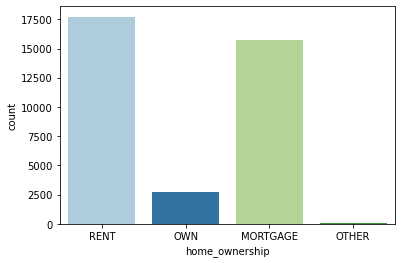

In [71]:
#Check the count per Home ownership
inp2_Fully_Paid_Charged_off.home_ownership.value_counts()
sns.countplot(x="home_ownership", data=inp2_Fully_Paid_Charged_off, palette="Paired")
plt.show()

# <b>Insights:
   #<b> BY looking at the plot, we can clearly say; there are more customers under Rent (home ownership) and followed by Mortgage

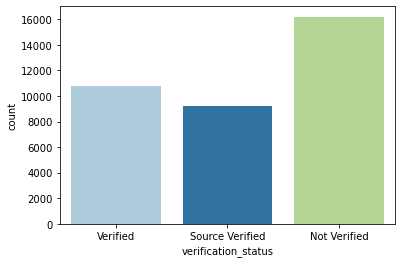

In [72]:
#Check the count per Verification status
inp2_Fully_Paid_Charged_off.verification_status.value_counts()
sns.countplot(x="verification_status", data=inp2_Fully_Paid_Charged_off, palette="Paired")
plt.show()

# <b>Insights:
   #<b> BY looking at the plot, we can clearly say; there are more customers under not verified verification status

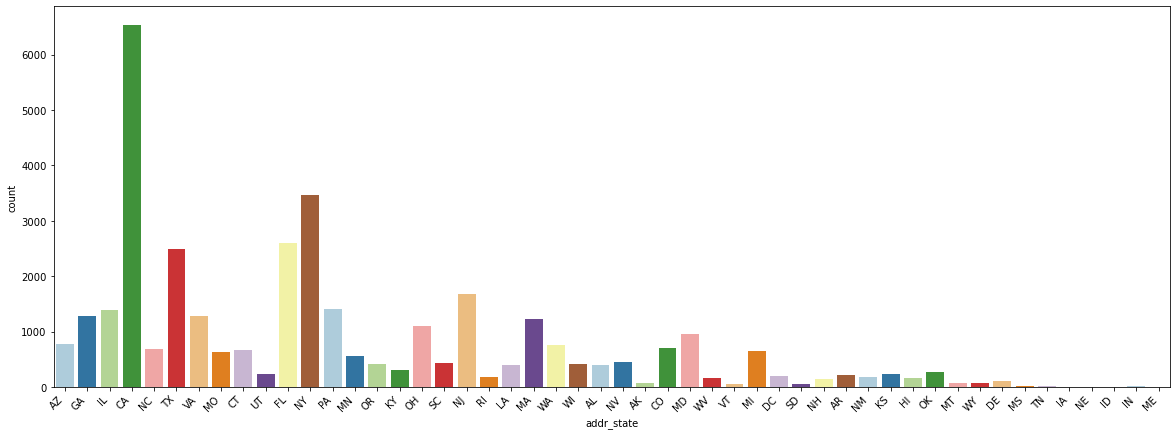

In [73]:
#Check the count per addr state
inp2_Fully_Paid_Charged_off.addr_state.value_counts()
countplt, ax = plt.subplots(figsize = (20,7))
sns.countplot(x="addr_state", data=inp2_Fully_Paid_Charged_off, palette="Paired")
plt.xticks(rotation=45, ha='right')
#plt.figure(figsize=(50,7))
plt.show()

# <b>Insights:
   #<b> BY looking at the plot, we can clearly say; there are more customers in CA state than the rest!

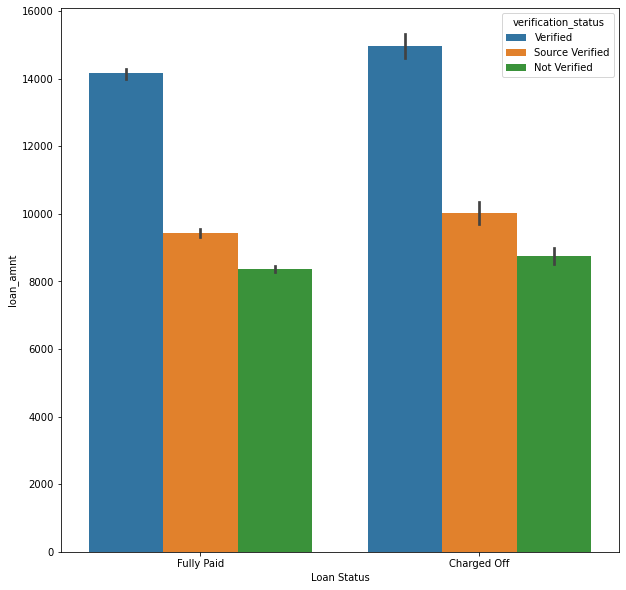

In [74]:
plt.figure(figsize=(10,10))
sns.barplot(x='loan_status',y='loan_amnt', hue='verification_status', data=inp2_Fully_Paid_Charged_off)
plt.xlabel("Loan Status")
plt.show()

# <b>Insights:
   #<b> Max no. of loans are charged off where verification status is Verified.

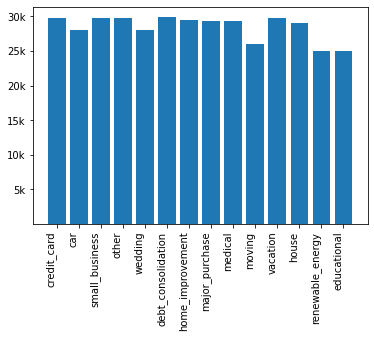

In [75]:
#Plotting bar chart between Loan amount and Purpose
plt.bar(inp2_Fully_Paid_Charged_off.purpose, inp2_Fully_Paid_Charged_off.loan_amnt)
ticks = np.arange(5000,35000,5000)
labels = ["{}k".format(i//1000) for i in ticks]
plt.yticks(ticks, labels)
plt.xticks(rotation=90, ha='right')
plt.show()

In [76]:
#:**Purpose of loan w.r.t % of loans charged off and no. of loan applicants**

In [77]:
def crosstab(df,col):
    '''
    df : Dataframe
    col: Column Name
    '''
    crosstab = pd.crosstab(df[col], df['loan_status'],margins=True)
    crosstab['Percentage_Charged Off'] = round(((100*crosstab['Charged Off'])/crosstab['All']),3)
    crosstab = crosstab[0:-1]
    return crosstab

In [78]:
# Probability of charge off
def bivariate_prob(df,col,stacked= True):
    '''
    df      : Dataframe
    col     : Column Name
    stacked : True(default) for Stacked Bar
    '''
    # get dataframe from crosstab function
    plotCrosstab = crosstab(df,col)
    
    linePlot = plotCrosstab[['Percentage_Charged Off']]      
    barPlot =  plotCrosstab.iloc[:,0:2]
    ax = linePlot.plot(figsize=(20,8), marker='o',color = 'b')
    ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=stacked)
    ax.set_title(df[col].name.title()+' vs Percentage Charge Off',fontsize=20,weight="bold")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
    ax.set_xlabel(df[col].name.title(),fontsize=14)
    ax.set_ylabel('Percentage of Charged off',color = 'b',fontsize=14)
    ax2.set_ylabel('Number of Applicants',color = 'g',fontsize=14)
    ax2.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
    plt.show()

loan_status,Charged Off,Fully Paid,All,Percentage_Charged Off
purpose,,,,
car,154,1290,1444,10.665
credit_card,486,4273,4759,10.212
debt_consolidation,2499,14444,16943,14.749
educational,52,264,316,16.456
home_improvement,311,2309,2620,11.870
house,53,279,332,15.964
major_purchase,207,1838,2045,10.122
medical,99,549,648,15.278
moving,82,460,542,15.129


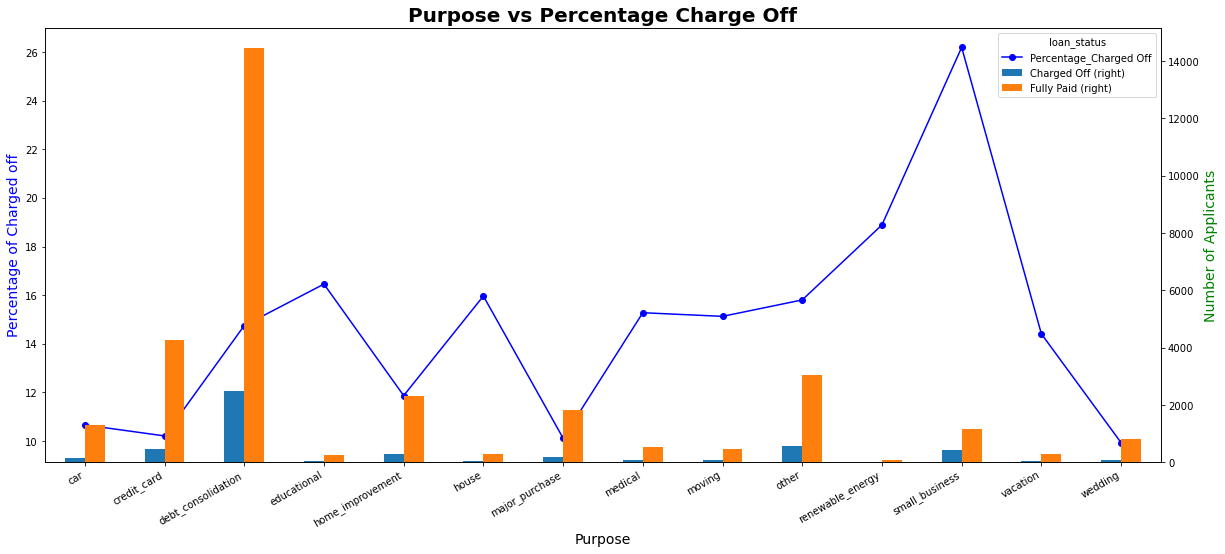

In [79]:
#Plotting the purpose w.r.t % of loans charged off and no. of loan applicants. 
purpose = crosstab(inp2_Fully_Paid_Charged_off,'purpose')
display(purpose)

bivariate_prob(df =inp2_Fully_Paid_Charged_off,col ='purpose',stacked=False) 

# <b>Insights:
Maximum no. of loans i.e. 17487 are accepted for the purpose of Debt Consolidation out of which 14827 are fully paid and 2660 are charged off i.e. 15.2%
Maximum % of a loan being charged off is for the purpose of small business and the % is 27.1.

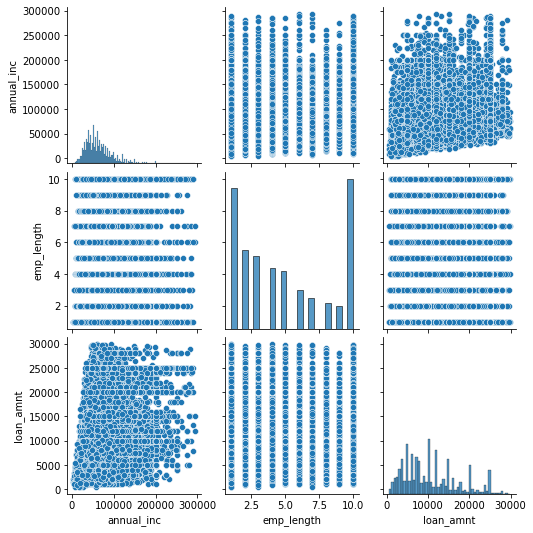

In [80]:
#pair plot for measures
sns.pairplot(inp2_Fully_Paid_Charged_off[[ 'annual_inc', 'emp_length','loan_amnt']])
plt.show()

In [81]:
#Check % Charged off in each state
inp2_groupby_state = (inp2_Fully_Paid_Charged_off[inp2_Fully_Paid_Charged_off['loan_status']=='Charged Off'].groupby('addr_state').size()/inp2_Fully_Paid_Charged_off.groupby('addr_state').size())*100

In [82]:
#Sort the %'s and check which state has more % of Chraged-off. Looking at the voulme we can confirm NV is high risk state (as NE has less data and can be considered as outlier)
inp2_groupby_state.sort_values(ascending=False)

addr_state
NE    60.000000
NV    21.300448
AK    18.571429
SD    18.333333
HI    17.721519
FL    17.421335
ID    16.666667
MO    16.613419
NM    16.184971
OR    16.144578
GA    15.595611
CA    15.515133
NJ    15.411974
MD    15.233161
NC    15.050651
WA    14.921466
UT    14.583333
OK    14.492754
KY    14.429530
MI    14.307932
AZ    14.285714
NH    14.093960
SC    13.958810
WI    13.414634
MN    13.274336
RI    13.227513
IL    13.174946
NY    12.932028
WV    12.820513
CT    12.686567
LA    12.500000
OH    12.353472
VA    12.052877
CO    11.797753
TN    11.764706
AR    11.711712
AL    11.557789
VT    11.538462
MA    11.507293
TX    11.433172
PA    11.379801
DE    11.111111
MT    10.958904
MS    10.526316
KS    10.126582
DC     6.467662
WY     2.702703
IA          NaN
IN          NaN
ME          NaN
dtype: float64

In [83]:
#inp2_groupby_state.to_frame(name='inp2_groupby_state_df')
inp2_groupby_state_df = pd.DataFrame(inp2_groupby_state)

In [84]:
#Counts per 
inp2_Fully_Paid_Charged_off[ (inp2_Fully_Paid_Charged_off['addr_state'] == 'NV') & (inp2_Fully_Paid_Charged_off['loan_status'] == 'Charged Off')].count()

id                        95
member_id                 95
loan_amnt                 95
funded_amnt               95
funded_amnt_inv           95
term                      95
int_rate                  95
installment               95
grade                     95
sub_grade                 95
emp_title                 95
emp_length                95
home_ownership            95
annual_inc                95
verification_status       95
issue_d                   95
loan_status               95
desc                      66
purpose                   95
title                     95
zip_code                  95
addr_state                95
dti                       95
mths_since_last_delinq    36
mths_since_last_record     9
next_pymnt_d               0
pub_rec_bankruptcies      95
dtype: int64

In [85]:
inp2_Fully_Paid_Charged_off[(inp2_Fully_Paid_Charged_off['loan_status']=='Charged Off') & (inp2_Fully_Paid_Charged_off['purpose']=='debt_consolidation')].groupby(['addr_state','purpose','grade']).size()

addr_state  purpose             grade
AK          debt_consolidation  A        1
                                B        1
                                C        2
                                E        2
AL          debt_consolidation  B        5
                                        ..
WI          debt_consolidation  F        2
WV          debt_consolidation  A        4
                                C        3
                                D        2
WY          debt_consolidation  D        1
Length: 241, dtype: int64

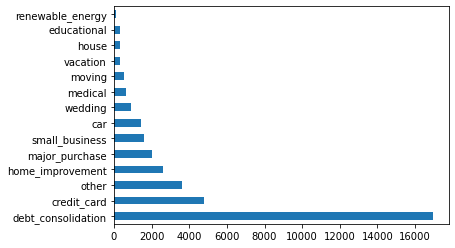

In [86]:
#plot base on purpose column with Charged off and Fully Paid data
inp2_Fully_Paid_Charged_off['purpose'].value_counts().plot.barh()
plt.show()

In [87]:
#Created result variable for heatmap
result = pd.pivot_table(data =inp2_Fully_Paid_Charged_off, index = "purpose", columns ="grade",values ="loan_amnt")

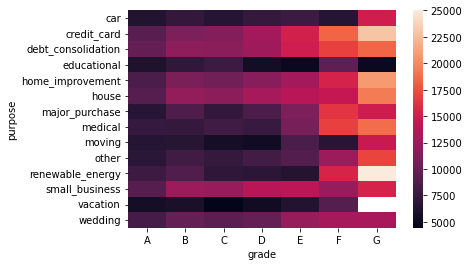

In [88]:
#Heat map to show the relation between three columns - purpose, grade and loan_amt
sns.heatmap(result)
plt.show()

In [89]:
#Created result1 variable for heatmap
result1 = pd.pivot_table(data =inp2_Fully_Paid_Charged_off, index = "grade", columns ="home_ownership",values ="int_rate")

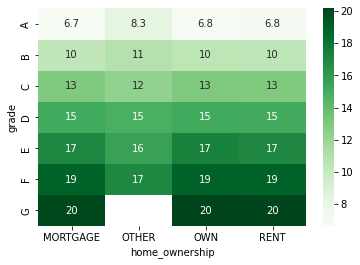

In [90]:
#Heat map to show the relation between three columns - home_ownership, grade and interest rate
sns.heatmap(result1, cmap = "Greens", annot = True)
plt.show()

In [91]:
loan_correlation = inp2_Fully_Paid_Charged_off.corr()
loan_correlation

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,mths_since_last_delinq,mths_since_last_record,pub_rec_bankruptcies
id,1.000000,0.993478,0.054400,0.067764,0.186973,0.013974,0.011595,0.102693,0.002721,0.091222,0.123781,0.703138,-0.007534
member_id,0.993478,1.000000,0.056878,0.069397,0.201401,0.011261,0.008251,0.107574,0.004647,0.092528,0.129599,0.719377,-0.007379
loan_amnt,0.054400,0.056878,1.000000,0.980725,0.925429,0.243259,0.928044,0.134801,0.371299,0.071928,0.022700,-0.010289,-0.026912
funded_amnt,0.067764,0.069397,0.980725,1.000000,0.945277,0.251805,0.955140,0.134957,0.367627,0.071462,0.023538,-0.020152,-0.027021
funded_amnt_inv,0.186973,0.201401,0.925429,0.945277,1.000000,0.243923,0.887839,0.148497,0.346403,0.081607,0.089133,0.466180,-0.032152
int_rate,0.013974,0.011261,0.243259,0.251805,0.243923,1.000000,0.226578,-0.015037,0.028054,0.108786,-0.053653,0.320265,0.086500
installment,0.011595,0.008251,0.928044,0.955140,0.887839,0.226578,1.000000,0.105894,0.371590,0.057851,0.006796,-0.073585,-0.023734
emp_length,0.102693,0.107574,0.134801,0.134957,0.148497,-0.015037,0.105894,1.000000,0.166920,0.050472,0.051948,0.243159,0.064550
annual_inc,0.002721,0.004647,0.371299,0.367627,0.346403,0.028054,0.371590,0.166920,1.000000,-0.121917,-0.006181,0.012253,-0.010283
dti,0.091222,0.092528,0.071928,0.071462,0.081607,0.108786,0.057851,0.050472,-0.121917,1.000000,0.069346,0.189573,0.006565


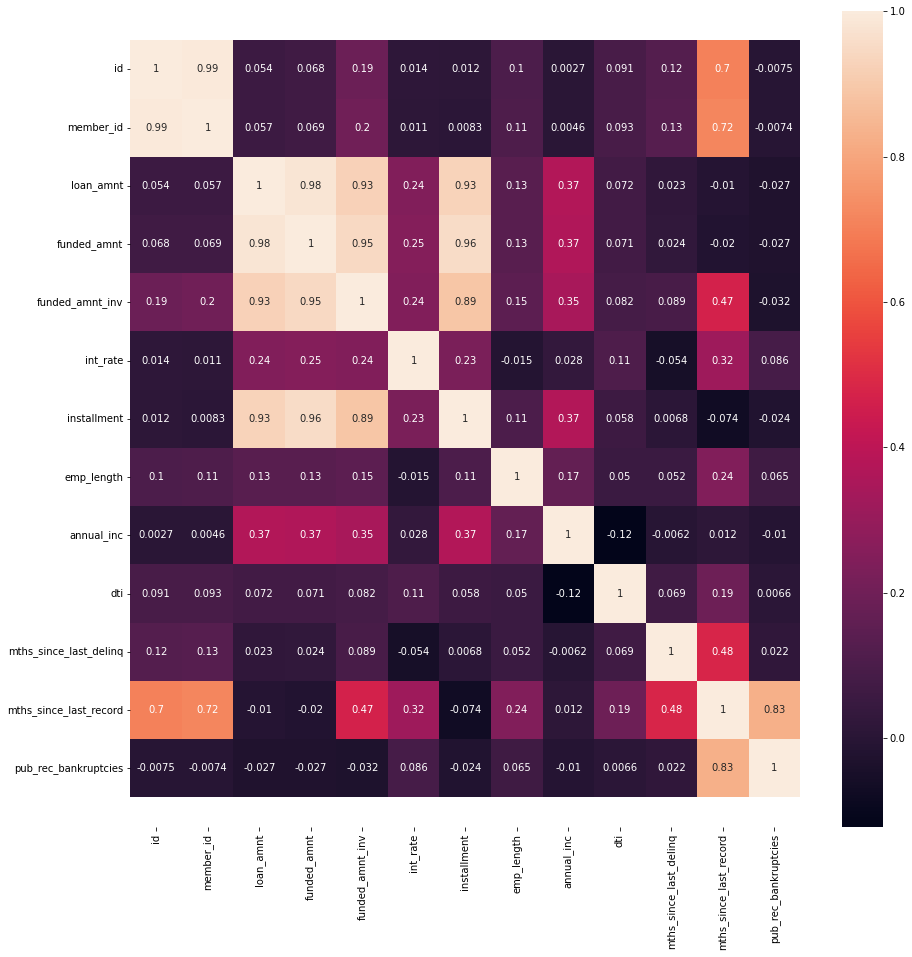

In [92]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(loan_correlation, 
            xticklabels=loan_correlation.columns.values,
            yticklabels=loan_correlation.columns.values,annot= True)

# fix for mpl bug that cuts off top/bottom of seaborn
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

# <b> Insights from above graph
Loan Amount, Funded Amount, Funded Amount invested and installment are highly correlated with each other.
Annual Income is negatively correlated with DTI.

# <b> Insights & Recommendataions:

1) Lending Club should consider accepting more loans for grades A and B. It should be cautious of loans falling in grades E, F & G
    
2) Lending Club should be wary of the loans where the purpose is Small Business as the percentage of a loan being charged off 
    is more. Accepting loans for the purpose of Weddings, major purchases, car, and credit cards are highly recommended
3) Lending Club should consider accepting more loans from people who own a house
    
4) Lending Club should consider accepting more loans from applicants whose annual income is > 100000 as their probability of charge off is minimal
    
5) Lending Club should accept more loans for the term of 36 months as the % of charged-off loans is less and the no. of loan applicants is more
    
6) Driver Variables: purpose, grade, term, int_rate, emp_length, annual_inc, loan_amnt, dti, home_ownership, addr_state, verification status;
